# <a id="list"> </a>
### STORYLINE
<table align="left">
    <tr>
        <td width="15%">
            <img src="images.png">
        </td>
        <td>
            <div align="left", style="font-size:130%">
                <font color="#21658D">
                    <b> <font color='blue'>"Octa Global Pvt. Ltd"</font> is launching a new Ramen brand across various countries of the world.It is named as <font color='blue'>"Octa Ramen"</font>. 
They have tasked <font color='orange'>"Team Octa"</font>to <span style='background :yellow' >carryout and demonstrate the feaseability and efficacy of the launch.</span></b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Understanding the data

#### We have a dataset containing the business statistics of the existing Ramen brands and their perfomance in the countries across the world. We will use this dataset in our analysis and try to arrive at a feasable business model.

#### Before proceeding any further, let us import the necessary python libraries.

In [2]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Let us see the number of features present in the given Ramen dataset.


#### To do this, we load the data set and type its head.

In [3]:
df = pd.read_csv('ramen-ratings.csv') # Loading the dataset
df.head() # Printing the fist 5 rows to see the available features

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


#### Columns in this dataframe are:

In [4]:
df.columns

Index(['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars', 'Top Ten'], dtype='object')

#### What are the number of rows and columns in the dataframe?

In [5]:
shape = df.shape
print("Rows :",shape[0])
print("Columns :",shape[1])

Rows : 2580
Columns : 7


#### What are the other details we can get out the dataframe?

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Review #  2580 non-null   int64  
 1   Brand     2580 non-null   object 
 2   Variety   2580 non-null   object 
 3   Style     2578 non-null   object 
 4   Country   2580 non-null   object 
 5   Stars     2577 non-null   float64
 6   Top Ten   37 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


#### Data Extracted from info() function:

#### 1) Rows are 2580 and Columns are 7
#### 2) There are 5 categorical columns and 2 numerical columns
#### 3) Memory consumption: 141.2 KB

#### What is the statistical summary of the numerical columns?

In [7]:
df.describe()

,Review #,Stars
count,2580.000000,2577.000000
mean,1290.500000,3.654676
std,744.926171,1.015331
min,1.000000,0.000000
25%,645.750000,3.250000
50%,1290.500000,3.750000
75%,1935.250000,4.250000
max,2580.000000,5.000000


#### What is the statistical summary of the categorical columns?

In [8]:
df.describe(include =['object'])

,Brand,Variety,Style,Country,Top Ten
count,2580,2580,2578,2580,37
unique,355,2413,7,38,37
top,Nissin,Chicken,Pack,Japan,2012 #5
freq,381,7,1531,352,1


#### What is the total statistical summary of the columns?

In [9]:
df.describe(include ="all")

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
count,2580.000000,2580,2580,2578,2580,2577.000000,37
unique,NaN,355,2413,7,38,NaN,37
top,NaN,Nissin,Chicken,Pack,Japan,NaN,2012 #5
freq,NaN,381,7,1531,352,NaN,1
mean,1290.500000,NaN,NaN,NaN,NaN,3.654676,NaN
std,744.926171,NaN,NaN,NaN,NaN,1.015331,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,645.750000,NaN,NaN,NaN,NaN,3.250000,NaN
50%,1290.500000,NaN,NaN,NaN,NaN,3.750000,NaN
75%,1935.250000,NaN,NaN,NaN,NaN,4.250000,NaN


#### We have a column named "Style" which contains different style of packing the Ramen items. Let us see its number distribution.

In [10]:
df['Style'].value_counts()

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64

#### Which column contains NaNs?

In [11]:
df.isna().any()

Review #    False
Brand       False
Variety     False
Style        True
Country     False
Stars        True
Top Ten      True
dtype: bool

### Let us see a bar plot visualisation of the columns with Nans

In [12]:
df.isna().sum() # Sum of NaNs in each column

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          3
Top Ten     2543
dtype: int64

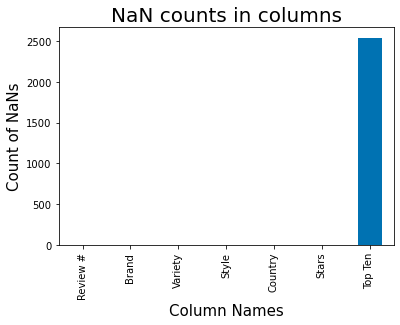

In [13]:
plt.style.use("seaborn-colorblind")
df.isna().sum().plot(kind="bar")
plt.title("NaN counts in columns",fontsize=20)
plt.ylabel("Count of NaNs",fontsize=15)
plt.xlabel("Column Names",fontsize=15)
plt.show()

# Cleaning the data 

#### We see that column "Style" has <font color='orange'>2</font>, "Stars" has <font color='orange'>3</font>  and "Top Ten" has <font color='orange'>2543</font> NaNs. It is imperative that we handle these values before we jump in for EDA.

In [14]:
df['Top Ten'].fillna(0, inplace=True) # For all the NaNs in "Top Ten" column, we have assigned a temporary value 0.
df['Top Ten'].isna().sum()

dfNan = df[df.isnull().any(axis=1)] # subsetting only the rows with NaNs
dfNan

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,0
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,0
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,0
2152,428,Kamfen,E Menm Chicken,NaN,China,3.75,0
2442,138,Unif,100 Furong Shrimp,NaN,Taiwan,3.00,0


#### Handling NaNs in Column "Style"

In [15]:
df.drop(2152, axis=0,inplace=True) # Dropping row 2152
df.drop(2442, axis=0,inplace=True) ## Dropping row 2442

#### We have dropped the 2 rows containing NaNs in "Style" column. Any relavent logic to handle NaNs can be applied. Dropping them seems to be more appropriate here.

#### Handling NaNs in Column "Stars"

In [16]:
dfNan = df[df.isnull().any(axis=1)]
dfNan

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,NaN,0
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,NaN,0
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,NaN,0


#### Logic employed to fill 3 NaNs in Column "Stars"

#### We have considered Brand ,Country from dfNan and subsetted a dataframe subDf from df and filled the column "Stars" with the mean value. Here is the piece of code doing it.

In [17]:
for i in dfNan.index:
    subDf = df.loc[(df['Brand']==dfNan.loc[i,'Brand']) & (df['Country']==dfNan.loc[i,'Country'])]
    mean = subDf['Stars'].mean()
    df.loc[i,'Stars'] = round(mean,2)

In [18]:
df.isna().sum() # Checking again for NaNs

Review #    0
Brand       0
Variety     0
Style       0
Country     0
Stars       0
Top Ten     0
dtype: int64

#### Remember we had stored dummy value "0" to the NaNs of column "Top Ten". Let us see how we can handle it.

In [19]:
df[df['Top Ten'] != 0]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
616,1964,MAMA,Instant Noodles Coconut Milk Flavour,Pack,Myanmar,5.00,2016 #10
633,1947,Prima Taste,Singapore Laksa Wholegrain La Mian,Pack,Singapore,5.00,2016 #1
655,1925,Prima,Juzz's Mee Creamy Chicken Flavour,Pack,Singapore,5.00,2016 #8
673,1907,Prima Taste,Singapore Curry Wholegrain La Mian,Pack,Singapore,5.00,2016 #5
752,1828,Tseng Noodles,Scallion With Sichuan Pepper Flavor,Pack,Taiwan,5.00,2016 #9
891,1689,Wugudaochang,Tomato Beef Brisket Flavor Purple Potato Noodle,Pack,China,5.00,2016 #7
942,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5.00,2015 #10
963,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5.00,2015 #7
995,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5.00,2015 #4
1059,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5.00,2015 #9


#### Nissin brand has the highest number of varities but it does not feature in the top ranking. This is a perfect example that one should maintain the quality of a product rather than the quantity. 

In [20]:
years=['2012','2013','2014','2015','2016']
for y in years:
    df[y+'_rank']=np.nan

In [21]:
for rank in df['Top Ten'].values:
    for y in years:
        if re.search('^'+y,str(rank)):
            index = df[df['Top Ten']==rank].index.values
            rank_number = str(rank).split()[-1]
            df.loc[index,y+'_rank'] = int(''.join([i for i in rank_number if i.isdigit()]))
df.drop('Top Ten', axis=1, inplace=True)

In [22]:
df.fillna(0, inplace=True)
df.head()

,Review #,Brand,Variety,Style,Country,Stars,2012_rank,2013_rank,2014_rank,2015_rank,2016_rank
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,0.0,0.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,0.0,0.0,0.0,0.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,0.0,0.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,0.0,0.0,0.0,0.0,0.0


In [23]:
df.isna().sum()

Review #     0
Brand        0
Variety      0
Style        0
Country      0
Stars        0
2012_rank    0
2013_rank    0
2014_rank    0
2015_rank    0
2016_rank    0
dtype: int64

In [24]:
df["2012_rank"].value_counts()

0.0     2569
4.0        1
2.0        1
1.0        1
9.0        1
6.0        1
3.0        1
5.0        1
7.0        1
10.0       1
Name: 2012_rank, dtype: int64

In [25]:
df["2013_rank"].value_counts()

0.0     2571
6.0        1
3.0        1
9.0        1
4.0        1
2.0        1
1.0        1
10.0       1
Name: 2013_rank, dtype: int64

In [26]:
df["2014_rank"].value_counts()

0.0     2570
1.0        1
6.0        1
5.0        1
8.0        1
10.0       1
9.0        1
4.0        1
7.0        1
Name: 2014_rank, dtype: int64

In [27]:
df["2015_rank"].value_counts()

0.0     2571
8.0        1
1.0        1
6.0        1
9.0        1
4.0        1
7.0        1
10.0       1
Name: 2015_rank, dtype: int64

In [28]:
df["2016_rank"].value_counts()

0.0     2572
7.0        1
9.0        1
5.0        1
8.0        1
1.0        1
10.0       1
Name: 2016_rank, dtype: int64

# Visualise and Analyse

#### Q) What is the popularity of ramens across the countries?

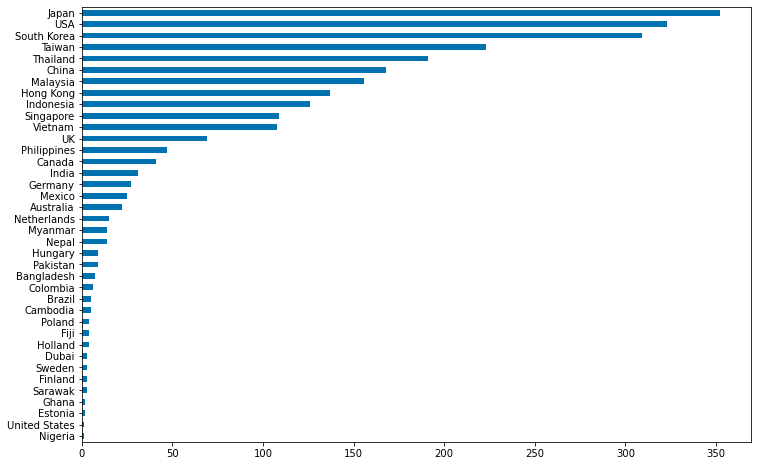

In [29]:
v = df.Country.value_counts()
v=v.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
v.plot(kind='barh')
plt.show()

#### what do we infer from the question "Popularity of ramens country-wise!"?

#### Ramen is very popular and highly preferred in Mangolian countries like Japan,China,South korea etc. Exception to this generalisation are USA and UK. We can say that migration of people from Mangolian countries to USA and UK is high and that has resulted in high Ramen Consumption in those 2 countries.

#### Q) Number of varities in each brand?

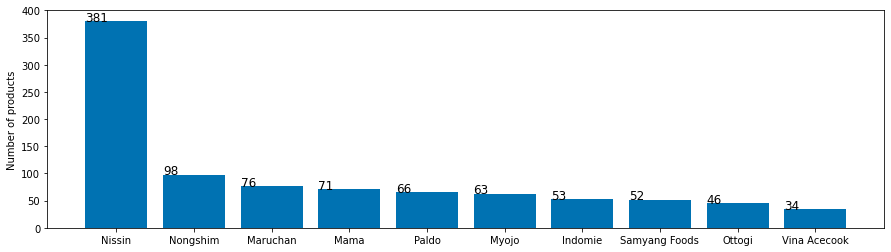

In [30]:
brands_name = df.Brand.value_counts()[:10].index
brand_size = df.Brand.value_counts()[:10].values

fig,ax=plt.subplots(figsize=(15,4))
ax.bar(brands_name, brand_size, data=df)
ax.set_ylabel('Number of products')
for p in ax.patches:
    an=ax.annotate(str(p.get_height()), xy=(p.get_x(),p.get_height()))
    an.set_size(12)

#### We see "Nissin" brand to be having the highest number of varities followed by "Nongshim" and "Maruchan" . 

#### Q) What are the popular "Styles" across countries?

In [31]:
style=df.Style.value_counts()
style

Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Bar        1
Can        1
Name: Style, dtype: int64

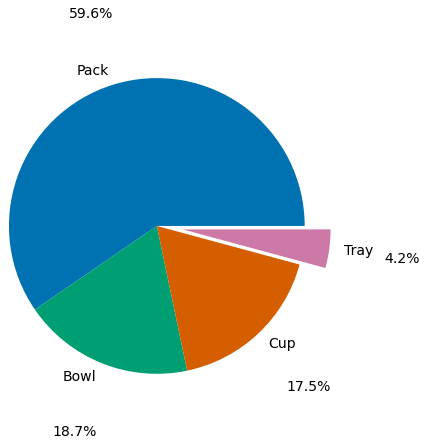

In [32]:
plt.pie(style[0:4],pctdistance=1.5,autopct="%2.01f%%",radius=1.7,labels=['Pack','Bowl','Cup','Tray'],
        explode=[0,0,0,0.3],
       textprops={'fontsize': 14})
plt.show()

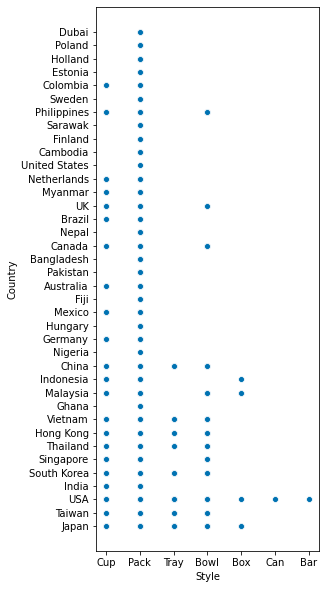

In [33]:
a4_dims = (4, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax, data=df,y='Country',x='Style')
plt.show()

#### what do we infer from the question "What are the popular "Styles" across the countries?"

#### "Pack" Style is most preferred with 59.6% and followed by "Bowl" and "Cup"(~18% each)

#### What is the density distribution for the "Stars" of Ramen?

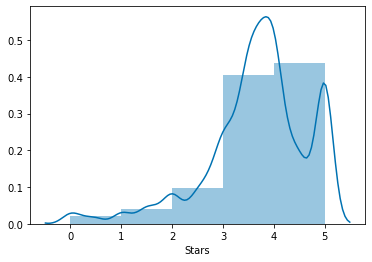

In [34]:
sns.distplot(df['Stars'],hist=True,kde=True,bins=5)
plt.show()

#### what do we infer from the question "What is the density distribution for the "Stars" of Ramen?"

#### The plot of density of "Stars" shows that it is "Left Skewed".

### Have you noticed that Japan, USA and South Korea are the top 3 consumers of Ramen?

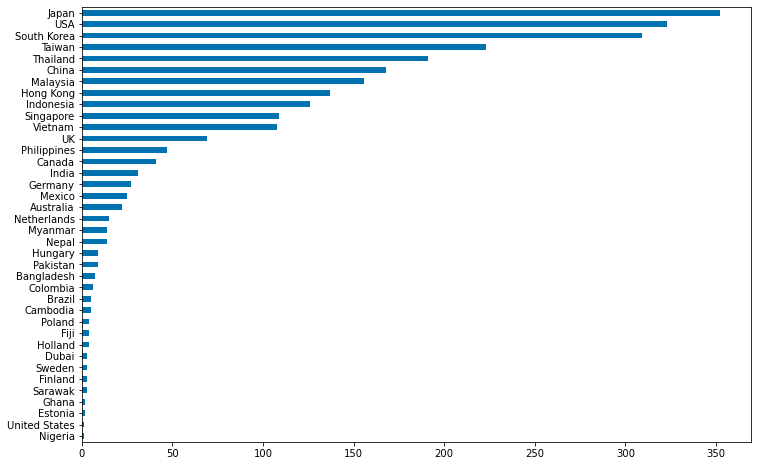

In [35]:
v = df.Country.value_counts()
v=v.sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(12,8))
v.plot(kind='barh')
plt.show()

### Let's analyse further....

#### Top 3 most preferred brands in Japan, USA and South Korea?

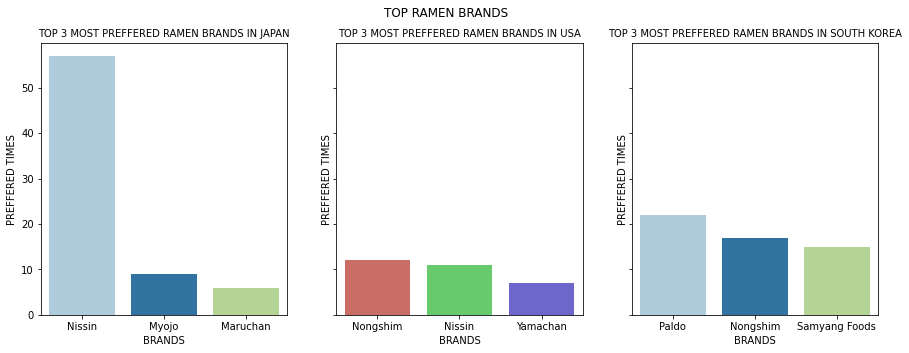

In [36]:
japan=df.loc[(df['Country'] == 'Japan') & (df['Stars'] >= 4.5)]
usa=df.loc[(df['Country'] == 'USA') & (df['Stars'] >= 4.5)]
south_korea=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4.5)]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# TITLE
fig.suptitle('TOP RAMEN BRANDS')
axes[0].set_title('TOP 3 MOST PREFFERED RAMEN BRANDS IN JAPAN',fontsize=10)
axes[1].set_title('TOP 3 MOST PREFFERED RAMEN BRANDS IN USA',fontsize=10)
axes[2].set_title('TOP 3 MOST PREFFERED RAMEN BRANDS IN SOUTH KOREA',fontsize=10)
axes[0].set_ylabel('PREFFERED TIMES', fontsize=10)
axes[0].set_xlabel('BRANDS', fontsize=10)
axes[1].set_ylabel('PREFFERED TIMES', fontsize=10)
axes[1].set_xlabel('BRANDS', fontsize=10)
axes[2].set_ylabel('PREFFERED TIMES', fontsize=10)
axes[2].set_xlabel('BRANDS', fontsize=10)

# JAPAN
x_jp= japan['Brand'].value_counts()
x_jp= x_jp[:3,]
sns.barplot(ax=axes[0],x=x_jp.index, y=x_jp.values,palette="Paired")

# USA
x_usa= usa['Brand'].value_counts()
x_usa= x_usa[:3,]
sns.barplot(ax=axes[1],x=x_usa.index,y= x_usa.values,palette="hls")

# SOUTH KOREA
x_sk= south_korea['Brand'].value_counts()
x_sk= x_sk[:3,]
sns.barplot(ax=axes[2],x=x_sk.index,y= x_sk.values,palette="Paired")
plt.show()

### Star Rating Analysis in Japan

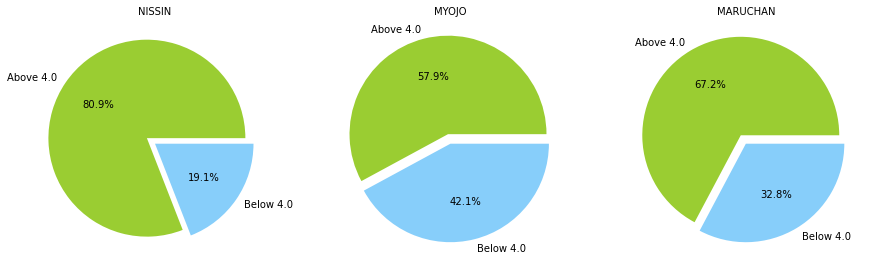

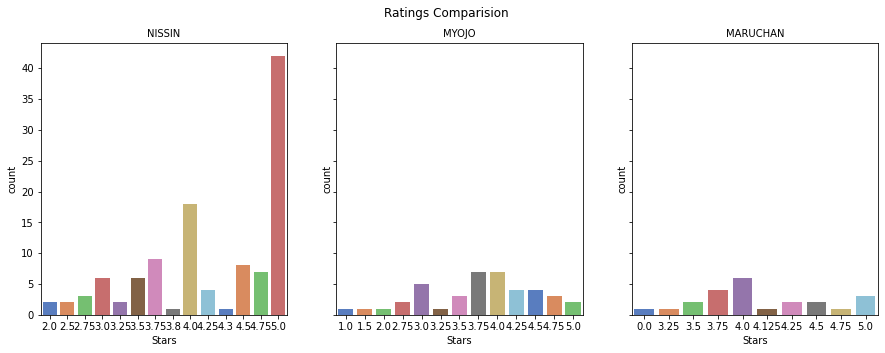

In [37]:
# NISSIN
jn1=df.loc[(df['Country'] == 'Japan') & (df['Stars'] >= 4)& (df['Brand']=='Nissin')]
jn2=df.loc[(df['Country'] == 'Japan') & (df['Stars'] < 4)& (df['Brand']=='Nissin')]
totjnp=jn1['Review #'].sum()
totjnn=jn2['Review #'].sum()
rev1 = totjnp,totjnn

# MYOJO
jmy1=df.loc[(df['Country'] == 'Japan') & (df['Stars'] >= 4)& (df['Brand']=='Myojo')]
jmy2=df.loc[(df['Country'] == 'Japan') & (df['Stars'] < 4)& (df['Brand']=='Myojo')]
totmyp=jmy1['Review #'].sum()
totmyn=jmy2['Review #'].sum()
rev2 = totmyp,totmyn

# MARUCHAN
jma1=df.loc[(df['Country'] == 'Japan') & (df['Stars'] >= 4)& (df['Brand']=='Maruchan')]
jma2=df.loc[(df['Country'] == 'Japan') & (df['Stars'] < 4)& (df['Brand']=='Maruchan')]
totmap=jma1['Review #'].sum()
totman=jma2['Review #'].sum()
rev3 = totmap,totman
labels = 'Above 4.0','Below 4.0'
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0) 
fig ,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].pie(rev1, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[1].pie(rev2, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[2].pie(rev3, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[0].set_title('NISSIN',fontsize=10)
ax[1].set_title('MYOJO',fontsize=10)
ax[2].set_title('MARUCHAN',fontsize=10)
plt.show()
japan_b1=df.loc[(df['Country'] == 'Japan') & (df['Brand']=='Nissin')]
japan_b2=df.loc[(df['Country'] == 'Japan') & (df['Brand']=='Myojo')]
japan_b3=df.loc[(df['Country'] == 'Japan') & (df['Brand']=='Maruchan')]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Ratings Comparision')
axes[0].set_title('NISSIN',fontsize=10)
axes[1].set_title('MYOJO',fontsize=10)
axes[2].set_title('MARUCHAN',fontsize=10)
sns.countplot(ax=axes[0],x="Stars", data=japan_b1, palette="muted")
sns.countplot(ax=axes[1],x="Stars", data=japan_b2, palette="muted")
sns.countplot(ax=axes[2],x="Stars", data=japan_b3, palette="muted")
plt.show()

### Star Rating Analysis in USA

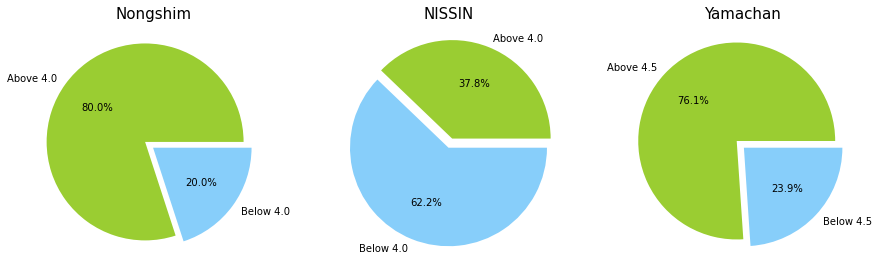

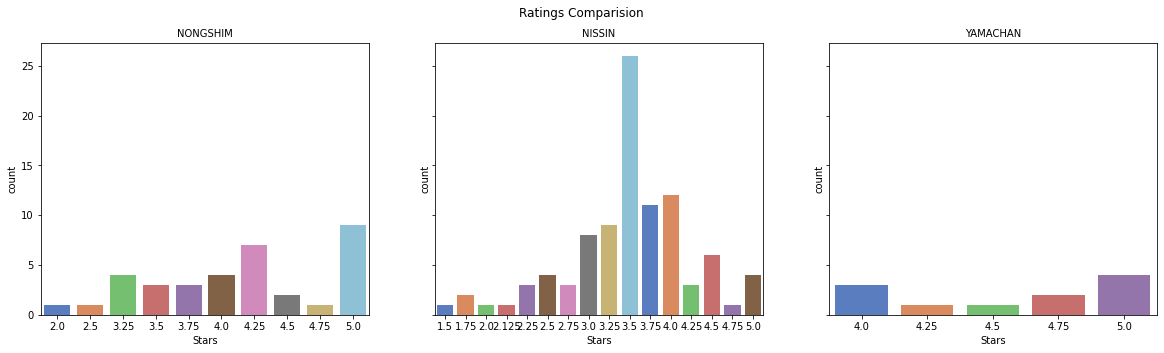

In [38]:
#Nongshim 
ub1=df.loc[(df['Country'] == 'USA') & (df['Stars'] >= 4)& (df['Brand']=='Nongshim')]
usb1=df.loc[(df['Country'] == 'USA') & (df['Stars'] < 4)& (df['Brand']=='Nongshim')]
totub1=ub1['Review #'].sum()
totusb1=usb1['Review #'].sum()
us1 = totub1,totusb1

# NISSIN
ub2=df.loc[(df['Country'] == 'USA') & (df['Stars'] >= 4)& (df['Brand']=='Nissin')]
usb2=df.loc[(df['Country'] == 'USA') & (df['Stars'] < 4)& (df['Brand']=='Nissin')]
totub2=ub2['Review #'].sum()
totusb2=usb2['Review #'].sum()
us2 = totub2,totusb2

#Yamachan
ub3=df.loc[(df['Country'] == 'USA') & (df['Stars'] >= 4.5)& (df['Brand']=='Yamachan')]
usb3=df.loc[(df['Country'] == 'USA') & (df['Stars'] < 4.5)& (df['Brand']=='Yamachan')]
totub3=ub3['Review #'].sum()
totusb3=usb3['Review #'].sum()
us3 = totub3,totusb3
labels = 'Above 4.0','Below 4.0'
label1="Above 4.5","Below 4.5"
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0) 
fig ,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].pie(us1, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[1].pie(us2, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[2].pie(us3, explode=explode, labels=label1, colors=colors,autopct='%1.1f%%')
ax[0].set_title('Nongshim',fontsize=15)
ax[1].set_title('NISSIN',fontsize=15)
ax[2].set_title('Yamachan',fontsize=15)
plt.show()
usa_b1=df.loc[(df['Country'] == 'USA') &  (df['Brand']=='Nongshim')]
usa_b2=df.loc[(df['Country'] == 'USA') &  (df['Brand']=='Nissin')]
usa_b3=df.loc[(df['Country'] == 'USA') &  (df['Brand']=='Yamachan')]
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Ratings Comparision')
axes[0].set_title('NONGSHIM',fontsize=10)
axes[1].set_title('NISSIN',fontsize=10)
axes[2].set_title('YAMACHAN',fontsize=10)
sns.countplot(ax=axes[0],x="Stars", data=usa_b1, palette="muted")
sns.countplot(ax=axes[1],x="Stars", data=usa_b2, palette="muted")
sns.countplot(ax=axes[2],x="Stars", data=usa_b3, palette="muted")
plt.show()

### Star Rating Analysis in South Korea

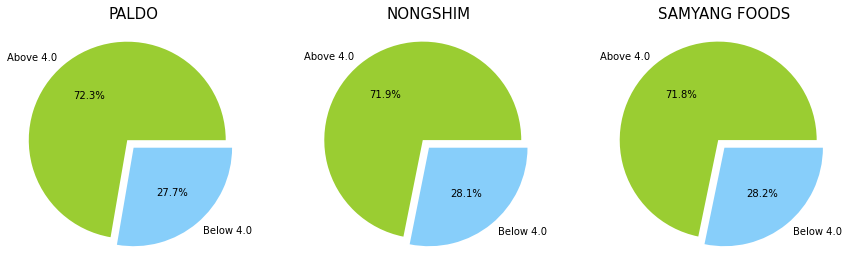

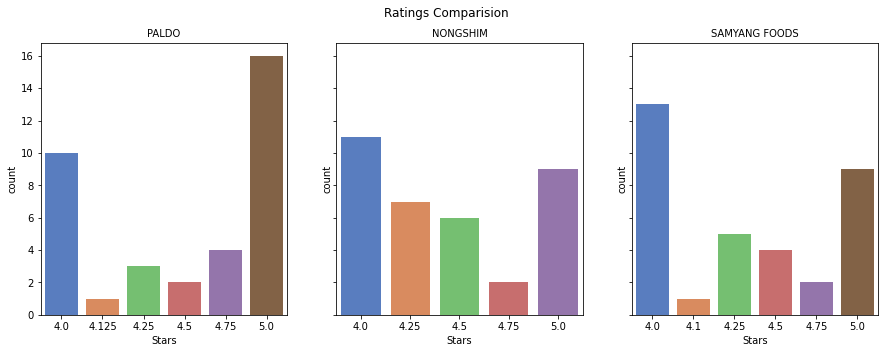

In [39]:
# PALDO
sk1=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4)& (df['Brand']=='Paldo')]
skb1=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] < 4)& (df['Brand']=='Paldo')]
totsk1=sk1['Review #'].sum()
totskb1=skb1['Review #'].sum()
rev1 = totsk1,totskb1

# NONGSHIM
sk2=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4)& (df['Brand']=='Nongshim')]
skb2=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] < 4)& (df['Brand']=='Nongshim')]
totsk2=sk2['Review #'].sum()
totskb2=skb2['Review #'].sum()
rev2 = totsk2,totskb2

# SAMYANG FOODS
sk3=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4)& (df['Brand']=='Samyang Foods')]
skb3=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] < 4)& (df['Brand']=='Samyang Foods')]
totsk3=sk3['Review #'].sum()
totskb3=skb3['Review #'].sum()
rev3 = totsk3,totskb3
labels = 'Above 4.0','Below 4.0'
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0) 
fig ,ax=plt.subplots(1,3,figsize=(15,15))
ax[0].pie(rev1, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[1].pie(rev2, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[2].pie(rev3, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%')
ax[0].set_title('PALDO',fontsize=15)
ax[1].set_title('NONGSHIM',fontsize=15)
ax[2].set_title('SAMYANG FOODS',fontsize=15)
plt.show()
south_k_b1=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4)& (df['Brand']=='Paldo')]
south_k_b2=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4)& (df['Brand']=='Nongshim')]
south_k_b3=df.loc[(df['Country'] == 'South Korea') & (df['Stars'] >= 4)& (df['Brand']=='Samyang Foods')]
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Ratings Comparision')
axes[0].set_title('PALDO',fontsize=10)
axes[1].set_title('NONGSHIM',fontsize=10)
axes[2].set_title('SAMYANG FOODS',fontsize=10)
sns.countplot(ax=axes[0],x="Stars", data=south_k_b1, palette="muted")
sns.countplot(ax=axes[1],x="Stars", data=south_k_b2, palette="muted")
sns.countplot(ax=axes[2],x="Stars", data=south_k_b3, palette="muted")
plt.show()

# Finally...

# Let us RECAP...

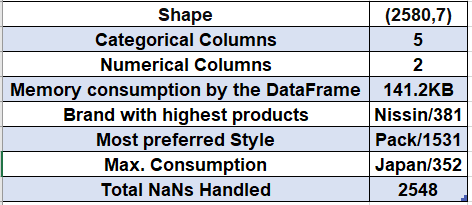

In [40]:
from IPython.display import Image
Image('recap.png',width=500,height=100)

# What  do we RECOMMEND?

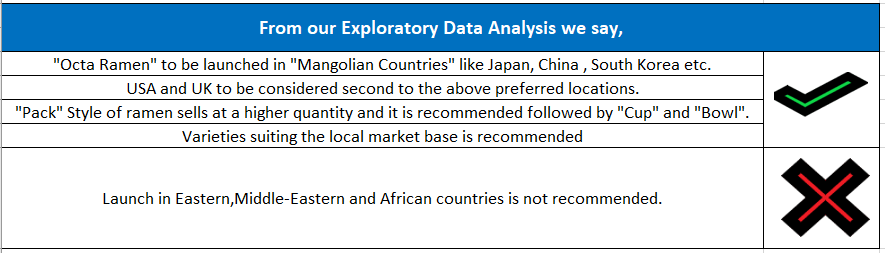

In [41]:
from IPython.display import Image
Image('Recommend.png',width=1000,height=100)